<a href="https://colab.research.google.com/github/SalamUddin844/Cow-Disease-Detection/blob/main/Cow_disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Cow/Cowdata.zip

Archive:  /content/drive/MyDrive/Colab_Notebooks/Cow/Cowdata.zip
replace Cowdata/dataset/test/lumpy/img1000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Cowdata/dataset/test/lumpy/img1000.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1001.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1002.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1003.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1004.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1005.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1006.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1007.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1008.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1009.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1011.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1012.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1013.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1014.jpg  
  inflating: Cowdata/dataset/test/lumpy/img1015.jpg  
  inflating: Cowdata/dataset/test/lum

# **Paths define**

In [ ]:
train_dir = '/content/Cowdata/dataset/train'
test_dir = '/content/Cowdata/dataset/test'
validation_dir = '/content/Cowdata/dataset/test'

# **image dimensions and batch size**

In [ ]:
img_width, img_height = 150, 150
batch_size = 32

# **Data augmentation and preprocessing**

# **Train set**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)



Found 816 images belonging to 2 classes.


# **Validation Set**

In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)



Found 120 images belonging to 2 classes.


# **Test set**

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 120 images belonging to 2 classes.


# **Model Architecture **

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=0.0001),
    metrics=['accuracy']
)

# **Train Model**

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[EarlyStopping(patience=10)]
)

Epoch 1/10
26/26 [==============================] - 54s 2s/step - loss: 1.0552 - accuracy: 0.5233 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 54s 2s/step - loss: 0.6851 - accuracy: 0.5478 - val_loss: 0.6753 - val_accuracy: 0.5000
Epoch 3/10
26/26 [==============================] - 53s 2s/step - loss: 0.6724 - accuracy: 0.5944 - val_loss: 0.6414 - val_accuracy: 0.7167
Epoch 4/10
26/26 [==============================] - 52s 2s/step - loss: 0.6653 - accuracy: 0.6127 - val_loss: 0.5815 - val_accuracy: 0.8250
Epoch 5/10
26/26 [==============================] - 52s 2s/step - loss: 0.6217 - accuracy: 0.6275 - val_loss: 1.5481 - val_accuracy: 0.5000
Epoch 6/10
26/26 [==============================] - 53s 2s/step - loss: 0.6622 - accuracy: 0.6238 - val_loss: 0.6353 - val_accuracy: 0.6083
Epoch 7/10
26/26 [==============================] - 51s 2s/step - loss: 0.6220 - accuracy: 0.6716 - val_loss: 0.4770 - val_accuracy: 0.8583
Epoch 8/10
26/26 [==

# **Model Evalution**

In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator)
validation_loss, validation_accuracy = model.evaluate(validation_generator)
test_loss, test_accuracy = model.evaluate(test_generator)

print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Train Loss:':<20} {train_loss}")
print(f"{'Train Accuracy:':<20} {train_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Validation Loss:':<20} {validation_loss}")
print(f"{'Validation Accuracy:':<20} {validation_accuracy}")
print('\n' + '-'*40 + '\n' + '-'*40)
print(f"{'Test Loss:':<20} {test_loss}")
print(f"{'Test Accuracy:':<20} {test_accuracy}")

4/4 [==============================] - 3s 664ms/step - loss: 0.4570 - accuracy: 0.8000

----------------------------------------
----------------------------------------
Train Loss:          0.5584673285484314
Train Accuracy:      0.6801470518112183

----------------------------------------
----------------------------------------
Validation Loss:     0.45702457427978516
Validation Accuracy: 0.800000011920929

----------------------------------------
----------------------------------------
Test Loss:           0.45702457427978516
Test Accuracy:       0.800000011920929


# **History Ploting**

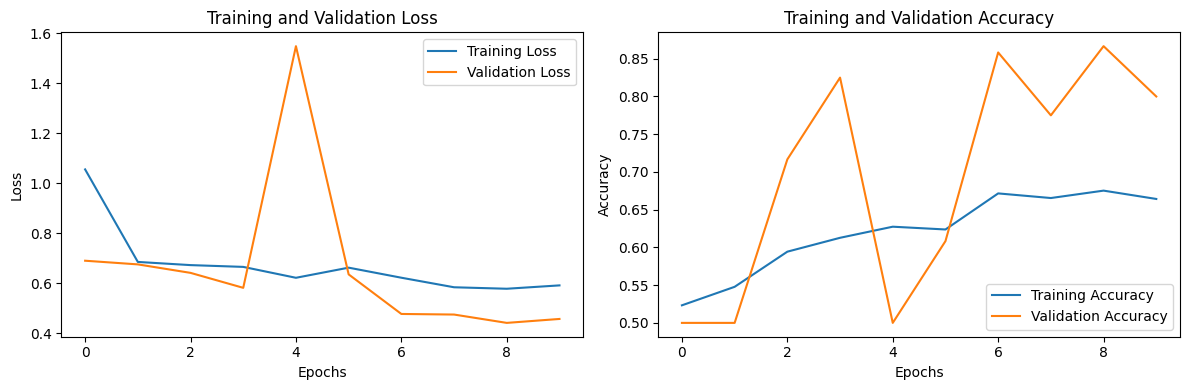

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# **Confution matrix**

In [ ]:
y_true = test_generator.classes
y_pred = model.predict(test_generator).argmax(axis=-1)
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


4/4 [==============================] - 2s 365ms/step
              precision    recall  f1-score   support

       lumpy       0.50      1.00      0.67        60
      normal       0.00      0.00      0.00        60

    accuracy                           0.50       120
   macro avg       0.25      0.50      0.33       120
weighted avg       0.25      0.50      0.33       120

Confusion Matrix:
[[60  0]
 [60  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Output Prediction**

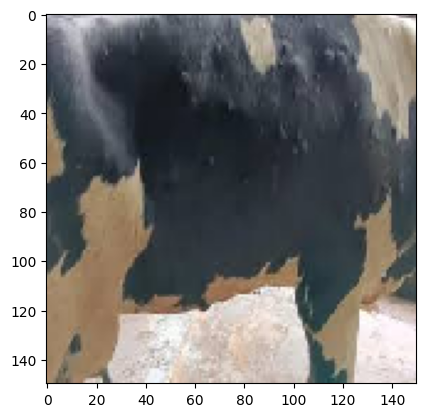

1/1 [==============================] - 0s 103ms/step
Healthy


In [ ]:
img_path = '/content/Cowdata/dataset/test/lumpy/img1015.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
plt.imshow(img, cmap='gray')
plt.show()
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.

prediction = model.predict(img)
class_indices = train_generator.class_indices

if prediction < 0.5:
    print("Lumpy")
else:
    print("Healthy")
